In [18]:
# Performing survival analysis using Kaplan Meier method

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

df=pd.read_csv("../1_data/private/preprocessed_data.csv")


c:\Users\jagir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:

#Survival Analysis

#KAPLAN MEIER CURVE BASED ON DEFERRAL TYPE

#whole blood donation based on deferral type (hgb deferral, other, completed donation - no deferral)

#create new dataframe with only WB donations

df_wb = df.drop(df[df.donation_product != "WB"].index)

#create fitter objects for the 3 types
kmf_hgb= KaplanMeierFitter()
kmf_other=KaplanMeierFitter()
kmf_comp=KaplanMeierFitter()

#divide data into 3 groups based on deferral type
hgb_def=df.query("OUTCOME_TYPE == 'low hgb'")
other_def=df.query("OUTCOME_TYPE == 'other deferral'")
comp_don=df.query("OUTCOME_TYPE == 'completed'")


,DonorID,Visit_Date,Visit_yr,Visit_Mo,donation_time,Visit_Age,sex,Fixed,MobileID,donation_product,...,category,DefCode,Def_start,Def_end,Deferral_permanent,EffectiveYr,EffectiveMo,OUTCOME_TYPE,CENSORED,time_to_return
59,18381,2018-01-10,2018.0,1.0,1645.0,55.1,F,Fixed Clinic,GQD002,DEF PROD,...,Haematocrit/Haemoglobin,Hb001 - Hb Fail (F < 50) 11 - < 12.5,2018-01-10 00:00:00.000,2018-04-10 00:00:00.000,Temp,2018.0,1.0,low hgb,1,105.0
60,18381,2018-04-25,2018.0,4.0,1625.0,55.4,F,Fixed Clinic,GQD002,DEF PROD,...,Haematocrit/Haemoglobin,Hb001 - Hb Fail (F < 50) 11 - < 12.5,2018-04-25 00:00:00.000,2018-07-24 00:00:00.000,Temp,2018.0,4.0,low hgb,1,154.0
142,18406,2021-07-06,2021.0,7.0,1525.0,66.1,M,Mobile Clinic,EWE025,DEF PROD,...,Haematocrit/Haemoglobin,Hb004 - Hb Fail (M Fpm) < 12.5,2021-07-06 00:00:00.000,2022-01-02 00:00:00.000,Temp,2021.0,7.0,low hgb,1,182.0
179,18500,2018-12-07,2018.0,12.0,929.0,44.3,F,Mobile Clinic,GGE200,DEF PROD,...,Haematocrit/Haemoglobin,Hb001 - Hb Fail (F < 50) 11 - < 12.5,2018-12-07 00:00:00.000,2019-03-07 00:00:00.000,Temp,2018.0,12.0,low hgb,1,119.0
204,18514,2018-09-03,2018.0,9.0,1335.0,42.9,F,Fixed Clinic,GED003,DEF PROD,...,Haematocrit/Haemoglobin,Hb001 - Hb Fail (F < 50) 11 - < 12.5,2018-09-03 00:00:00.000,2018-12-02 00:00:00.000,Temp,2018.0,9.0,low hgb,1,121.0


Text(0.5, 1.0, 'Cumulative density function of time to return after deferral')

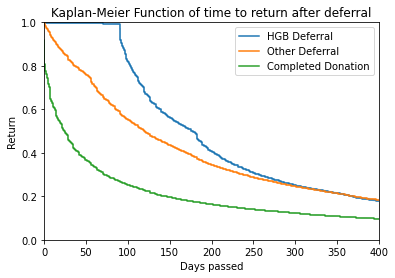

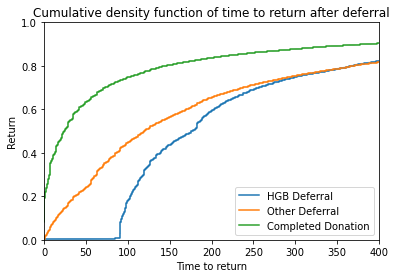

In [22]:
#fiiting the curves
kmf_hgb.fit(durations =  hgb_def["time_to_return"],event_observed = hgb_def["CENSORED"] ,label="HGB Deferral")
kmf_other.fit(durations =  other_def["time_to_return"],event_observed = other_def["CENSORED"], label="Other Deferral")
kmf_comp.fit(durations =  comp_don["time_to_return"],event_observed = comp_don["CENSORED"], label="Completed Donation")

#plot survival function data
kmf_hgb.plot()
kmf_other.plot()
kmf_comp.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return after deferral")

#plot cumulative density functions
plt.figure()
kmf_hgb.plot_cumulative_density()
kmf_other.plot_cumulative_density()
kmf_comp.plot_cumulative_density()
plt.axis([0, 400, 0, 1])
plt.ylabel("Return")
plt.xlabel("Time to return")
plt.title("Cumulative density function of time to return after deferral")

In [ ]:
# KM fixed, mobile - for the 3 categories

In [ ]:
# KM on donation procedure